In [1]:
# Lab 6 Softmax Classifier
import tensorflow as tf
import numpy as np

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
x_raw = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_raw = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

In [4]:
x_data = np.array(x_raw, dtype=np.float32)
y_data = np.array(y_raw, dtype=np.float32)

In [5]:
nb_classes = 3

In [6]:
model = tf.keras.Sequential()

In [7]:
model.add(tf.keras.layers.Dense(input_dim=4, units=nb_classes, use_bias=True))  # use_bias is True, by default

In [8]:
# use softmax activations: softmax = exp(logits) / reduce_sum(exp(logits), dim)
model.add(tf.keras.layers.Activation('softmax'))

In [9]:
# use loss == categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_data, y_data, epochs=2000, verbose=0)

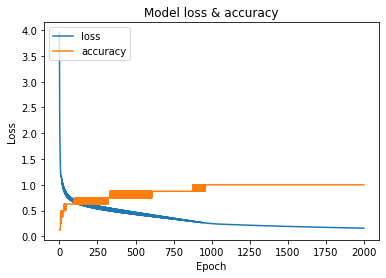

[1.0, 1.0, 1.0, 1.0, 1.0]


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()
print(history.history['accuracy'][-5:])

In [13]:
print('--------------')
# Testing & One-hot encoding
a = model.predict(np.array([[1, 11, 7, 9]]))
print(a, tf.keras.backend.eval(tf.argmax(a, axis=1)))

--------------
[[7.812085e-03 9.921780e-01 9.993309e-06]] [1]


In [14]:
print('--------------')
b = model.predict(np.array([[1, 3, 4, 3]]))
print(b, tf.keras.backend.eval(tf.argmax(b, axis=1)))

--------------
[[0.82840973 0.1544738  0.01711649]] [0]


In [15]:
print('--------------')
# or use argmax embedded method, predict_classes
c = model.predict(np.array([[1, 1, 0, 1]]))
c_onehot = model.predict(np.array([[1, 1, 0, 1]]))
print(c, c_onehot)

--------------
[[1.5561278e-08 3.6693376e-04 9.9963307e-01]] [[1.5561278e-08 3.6693376e-04 9.9963307e-01]]


In [16]:
print('--------------')
all = model.predict(np.array([[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]))
all_onehot = model.predict(np.array([[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]))
print(all, all_onehot)

--------------
[[7.8121000e-03 9.9217802e-01 9.9933186e-06]
 [8.2840967e-01 1.5447386e-01 1.7116498e-02]
 [1.5561278e-08 3.6693376e-04 9.9963307e-01]] [[7.8121000e-03 9.9217802e-01 9.9933186e-06]
 [8.2840967e-01 1.5447386e-01 1.7116498e-02]
 [1.5561278e-08 3.6693376e-04 9.9963307e-01]]
